In [2]:
import numpy as np

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

In [10]:
dataset = pd.read_csv("FuelConsumption.csv")
dataset.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [18]:
EngineSize = dataset["ENGINESIZE"]

#It will add all the data of the column and if any null value comes, it will skip the values
EngineSize.sum(axis=0, skipna=True) 

3570.5

In [19]:
mean = 3570.5/1067
print(mean)

3.346298031865042


In [20]:
dataset.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [21]:
dataset.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [31]:
dataset.drop(["MAKE","MODEL","VEHICLECLASS","FUELTYPE"], axis=1, inplace=True)

In [32]:
dataset.head(5)

,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,AS5,9.9,6.7,8.5,33,196
1,2.4,4,M6,11.2,7.7,9.6,29,221
2,1.5,4,AV7,6.0,5.8,5.9,48,136
3,3.5,6,AS6,12.7,9.1,11.1,25,255
4,3.5,6,AS6,12.1,8.7,10.6,27,244


In [33]:
dataset.drop(["TRANSMISSION","FUELCONSUMPTION_CITY"], axis=1, inplace=True)

In [34]:
dataset.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,6.7,8.5,33,196
1,2.4,4,7.7,9.6,29,221
2,1.5,4,5.8,5.9,48,136
3,3.5,6,9.1,11.1,25,255
4,3.5,6,8.7,10.6,27,244


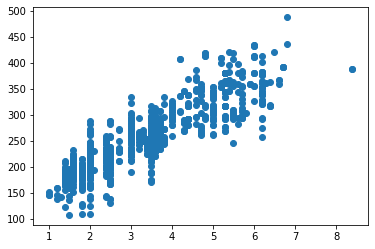

In [35]:
plt.scatter(dataset.ENGINESIZE,dataset.CO2EMISSIONS)

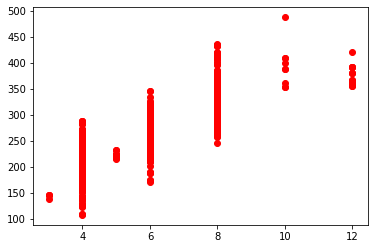

In [36]:
plt.scatter(dataset.CYLINDERS, dataset.CO2EMISSIONS, color="red")

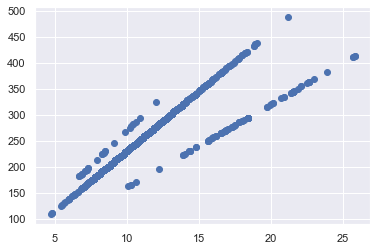

In [40]:
plt.scatter(dataset.FUELCONSUMPTION_COMB, dataset.CO2EMISSIONS)

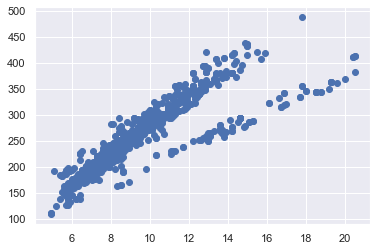

In [41]:
plt.scatter(dataset.FUELCONSUMPTION_HWY, dataset.CO2EMISSIONS)

In [46]:
dataset.drop(["FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB"], axis=1, inplace=True)
dataset.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,33,196
1,2.4,4,29,221
2,1.5,4,48,136
3,3.5,6,25,255
4,3.5,6,27,244


In [48]:
dataset.drop("CYLINDERS",axis=1, inplace=True)

In [49]:
dataset.head(5)

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244


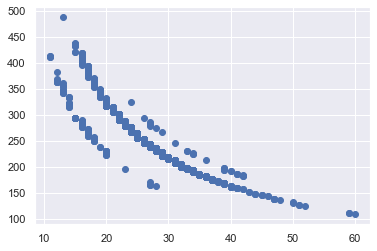

In [50]:
plt.scatter(dataset.FUELCONSUMPTION_COMB_MPG,dataset.CO2EMISSIONS)

In [51]:
dataset.drop("FUELCONSUMPTION_COMB_MPG",axis=1,inplace=True)
dataset.head(10)

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
5,3.5,230
6,3.5,232
7,3.7,255
8,3.7,267
9,2.4,212


In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [53]:
X = dataset["ENGINESIZE"]
y = dataset["CO2EMISSIONS"]

In [55]:
X.shape

(1067,)

In [56]:
dataset.describe()

,ENGINESIZE,CO2EMISSIONS
count,1067.000000,1067.000000
mean,3.346298,256.228679
std,1.415895,63.372304
min,1.000000,108.000000
25%,2.000000,207.000000
50%,3.400000,251.000000
75%,4.300000,294.000000
max,8.400000,488.000000


In [59]:
newx = X.values
print(newx)

[2.  2.4 1.5 ... 3.  3.2 3.2]


In [70]:
X = newx.reshape(1067,1)
X.shape
X

array([[2. ],
       [2.4],
       [1.5],
       ...,
       [3. ],
       [3.2],
       [3.2]])

In [61]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
model.predict(np.array([2.0]).reshape(-1,1))

array([203.55449907])

In [74]:
dataset.head(10)

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
5,3.5,230
6,3.5,232
7,3.7,255
8,3.7,267
9,2.4,212
